**Project Report -- Rotational Invariance Learning of Satellite Images**

Objects in satellite images are naturally prone to be rotated.  In the simple case of trying to train a classifier to detect if a ship is in an image or not, our goal is to see if a rotation invarient 2D CNN can accomplish this task more efficently than a standard CNN.  

To this end, we use the steerable CNN, designed by Cohen, Taco and Welling in 2016, and presented on by Seoyeon.  

The nessesary librarys can be found in the `environment.yaml` file. 

Also note, the model is set up to be trained using a wandb.ai logger.  If you don't have a wandb.ai account, comment out this logger.  

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

**Dataset: Ships in Satellite Imagery**

The dataset can be found here: https://www.kaggle.com/datasets/rhammell/ships-in-satellite-imagery?resource=download

First, create a folder called `data` in the main directory.  Then, unzip the downloaded dataset and move the `shipsnet` folder to the `data` folder.  

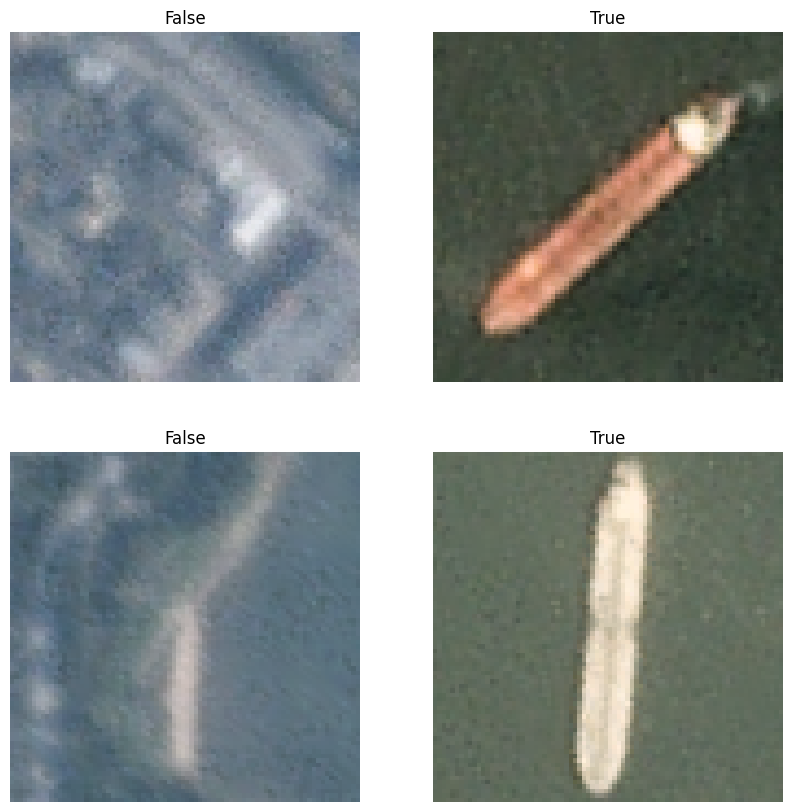

In [5]:
#plot examples of the data
#choose examples from data/shipsnet that contain 0 as first element of the filename
root_dir = '/Users/danielralston/Desktop/shipnet'

examples_false = [
    '/data/shipsnet/0__20170314_155238_0c12__-122.43754286369554_37.65632994361575.png',
    '/data/shipsnet/0__20170314_155238_0c12__-122.3801496699059_37.711473811424455.png',
    ]

examples_true = [
    '/data/shipsnet/1__20180706_180314_1024__-118.16449759261873_33.728995555872416.png',
    '/data/shipsnet/1__20180708_180908_0f47__-118.14474364290032_33.73618773660339.png',
]

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, example in enumerate(examples_false):
    img = plt.imread(root_dir + example)
    ax[i, 0].imshow(img)
    ax[i, 0].set_title('False')
    ax[i, 0].axis('off')

for i, example in enumerate(examples_true):
    img = plt.imread(root_dir + example)
    ax[i, 1].imshow(img)
    ax[i, 1].set_title('True')
    ax[i, 1].axis('off')

**Model**

To briefly recap Steerable CNNs, they are a class of CNNs where the convolutional filters are designed to be steerable, enabling the network to exploit rotational equivariance. For instance, if the input image is rotated by an angle $\theta$, the feature maps produced will also be rotated by the same angle, thus maintaining consistent responses to patterns irrespective of orientation. Mathematically, steerable filters can be formulated as linear combinations of a set of basis filters, where the coefficients change with the rotation, described by $f_\theta(x, y) = \sum_{i} w_i(\theta) f_i(x, y)$. At least in theory, this property grants improved generalization capabilities and requires fewer parameters, as it reduces the need to learn redundant features at various orientations.

| Model           | Trainable Params | Non-trainable Params | Total Params | Total Estimated Model Params Size (MB) |
|-----------------|------------------|----------------------|--------------|---------------------------------------|
| SO2SteerableCNN | 544 K            | 6.4 K                | 551 K        | 2.205                                 |
| CNN             | 3.3 M            | 0                    | 3.3 M        | 13.150                                |

The objective is to see if the rotational invariance of the geometric invariant CNN over $SO_2$ is superior to a traditional CNN -- what is the efficiency of invariance?

**Training**

Train the model using the `pytorch-lightning` training functionality in `train.py`.  

We use the loss function binary cross entropy loss 
$$L(y, \hat{y}) = -\left[ y \log(\sigma(\hat{y})) + (1 - y)\log(1 - \sigma(\hat{y})) \right]$$
which represents difference between the predicted probabilities and the true binary labels. 

If the network is making perfect predictions, the loss will be zero, since for $y_i = 1$ and $\sigma(\hat{y}_i) = 1$, the loss term becomes $-\log(1) = 0$, and for $y_i = 0$ and $\sigma(\hat{y}_i) = 0$, the loss term again becomes $-\log(1) = 0$.

In [ ]:
from src.train import main

main()

**Performance**

Astral-Lake-6: Steerable CNN run

Fast-Microwave-13: Test CNN run

![Validation Loss per Epoch](/home/dralston/shipnet/documentation/images/val_per_epoch.png)

![Training Loss per Epoch](/home/dralston/shipnet/documentation/images/train_per_epoch.png)

**Training Parameters**

| Parameter | Value |
|-----------------|------------------|
| Epochs | 100 |
| Training Set Size | 2800 |
| Validation Set Size | 600 |
| Test Set Size | 600 |
| Final Train Loss: Steerable CNN | $\approx 0.0003$ |
| Final Train Loss: Test CNN | $\approx 0.003$ |
| Final Validation Loss: Steerable CNN | $\approx 0.027$ |
| Final Validation Loss: Test CNN | $\approx 0.0551$ |
| Final Test Loss: Steerable CNN | $\approx 0.024$ |
| Final Test Loss: Test CNN | $\approx 0.064$ |


**Conclusion** 

The improved performance of the Steerable CNN over the traditional vanilla CNN in classifying satellite images can be attributed to its sophisticated design that inherently accounts for rotational and reflectional symmetries present in the data. With steerable filters, the network can capture and generalize patterns regardless of their orientation in the image, leading to better feature extraction with significantly fewer parameters -- i.e. one filter can capture a more robust feature map. This reduction in parameters leads to computational efficiency and helps in mitigating the risk of overfitting.  However, we do observe some overfitting in our training, by the order of magnitude of discreptency of the training loss and the validation loss.  For future work, this experiment suggests a Steerable CNN might be a model of choice for semantic segmentation or classification of satellite data.  